In [4]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate
from scipy.interpolate import interp1d
import json
from bson import json_util, ObjectId
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.rslp import RSLPStemmer
from nltk.cluster.util import cosine_distance
from re import *
from collections import Counter
import networkx as nx
import cProfile
import bokeh
from gensim import corpora, models, similarities
from string import punctuation
from gensim.models.word2vec import Word2Vec
from bokeh.plotting import figure, output_notebook, show, vplot
from sklearn.cluster import AffinityPropagation, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
output_notebook()
%pylab inline

Loading BokehJS ...

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
with open('/home/elisa/Projetos/TCC/Mediacloud_data/charliehebdo.json') as f:
    a = f.read()
    list_of_dict = json_util.loads(a)

    

In [6]:
del_pos = []
for pos,i in enumerate(list_of_dict):
    if 'published' not in i:
        i['published'] = i['updated']
    if i['published'].year < 2015:
        del_pos.append(i)
        

In [7]:
with open('/home/elisa/Projetos/TCC/Mediacloud_data/charliehebdo.json') as f:
    a = f.read()
    list_of_dict = json_util.loads(a)
    
del_pos = []
for pos,i in enumerate(list_of_dict):
    if 'published' not in i:
        i['published'] = i['updated']
    if i['published'].year < 2015:
        del_pos.append(i)
        
for i in del_pos:
    list_of_dict.remove(i)
    
from operator import itemgetter
data = sorted(list_of_dict, key=itemgetter('published'))
del data[0]

In [8]:
from operator import itemgetter
data = sorted(list_of_dict, key=itemgetter('published'))
del data[0]

In [9]:
len(data)

2129

In [12]:
with open('/home/elisa/Documents/Projetos/TCC/cervero2.json') as f:
    a = f.read()
    data2 = json_util.loads(a)

FileNotFoundError: [Errno 2] No such file or directory: '/home/elisa/Documents/Projetos/TCC/cervero2.json'

In [ ]:
with open('/home/elisa/Documents/Projetos/TCC/role.json') as f:
    a = f.read()
    data3 = json_util.loads(a)

In [10]:
def create_time_list(data):
    lista = []
    for i in data:
        if 'published' in i:
            lista.append(i['published'])
        else:
            lista.append(i['updated'])
    return lista

def period(datetime, hour_period):
    dic = {}
    quant_period = 24 / hour_period
    hours = 0
    for i in range(1, int(quant_period + 1)):
        count = 0
        while count < hour_period:
            dic[hours] = i
            count += 1
            hours += 1
    return dic[datetime.hour]


def create_count_list(article_list):
    count_list = [[datetime.datetime(2013, 2, 2, 0, 0, 0), 0, 1]]
    for d in article_list:
        article_period = period(d, 2)
        for j in count_list:
            aux = False
            if d.date() == j[0].date():
                if article_period == j[2]:
                    aux = True
                    j[1] += 1
                    break
        if aux == False:
            count_list.append([d, 1, article_period])
    count_list.pop(0)
    count_list.sort()
    return count_list

In [11]:
def count_datetime(list_datetime):
    count_vector = {}
    for pos, date1 in enumerate(list_datetime):
        model = datetime.datetime(date1.year,date1.month,date1.day,date1.hour)
        if model not in count_vector:
            count = 0
            for date2 in list_datetime[pos:]:
                if date1.date() == date2.date():
                    if date1.hour == date2.hour:
                        count+=1
            count_vector[model] = count
    return count_vector

In [12]:
time_list = create_time_list(data)

In [13]:
c = count_datetime(time_list)

In [14]:
x_list = []
y_list = []
for i in c:
    x_list.append(i)
    y_list.append(c[i])

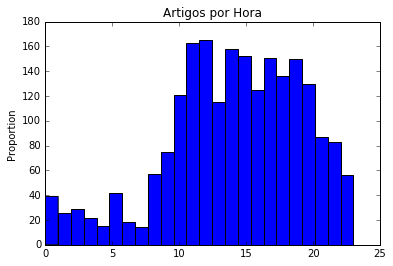

In [15]:
hour_list = []
for i in time_list:
    hour_list.append(i.hour)
    
plt.hist(hour_list, bins=24)
plt.title('Artigos por Hora')
plt.xlabel('')
plt.ylabel('Proportion')
plt.savefig('2.1-SIR.png', dpi=900)
plt.show()

In [16]:
time_list.sort()

In [17]:
list_dates = []
for i in time_list:
    list_dates.append(i.date())
    

In [18]:
list_dates = list_dates[6:]

In [32]:
O = nx.read_gpickle('/home/elisa/Projetos/TCC/charlie_results/original_graph.gpickle')
nodes = np.loadtxt(open('/home/elisa/Projetos/TCC/charlie_results/original_graph_nodes.csv'), delimiter=",")
with open('/home/elisa/Projetos/TCC/charlie_results/graph_original_domains_each_node.txt') as f:
    domains = f.read().splitlines()

In [33]:
fs = []
for node in O.nodes():
    if O.node[node]['date'].date() == datetime.date(2015, 1, 7):
        fs.append([O.node[node]['domain'] ])

In [34]:
fs

[['www.ptjornal.com'],
 ['www.meioemensagem.com.br'],
 ['br.noticias.yahoo.com'],
 ['estadao.feedsportal.com'],
 ['estadao.feedsportal.com'],
 ['estadao.feedsportal.com'],
 ['estadao.feedsportal.com'],
 ['estadao.feedsportal.com'],
 ['br.noticias.yahoo.com'],
 ['www.dgabc.com.br'],
 ['www.jb.com.br'],
 ['opiniaoenoticiascombr.feedsportal.com'],
 ['feeds.jn.pt'],
 ['www.gazetadopovo.com.br'],
 ['br.noticias.yahoo.com'],
 ['feeds.jn.pt'],
 ['feeds.jn.pt'],
 ['g1.globo.com'],
 ['www.brasilimprensalivre.com.br'],
 ['estadao.feedsportal.com'],
 ['g1.globo.com'],
 ['www.jb.com.br'],
 ['feeds.jn.pt'],
 ['www.jb.com.br'],
 ['www.jb.com.br'],
 ['estadao.feedsportal.com'],
 ['br.noticias.yahoo.com'],
 ['aquiacontece.com.br'],
 ['feeds.jn.pt'],
 ['www.ptjornal.com'],
 ['estadao.feedsportal.com'],
 ['www.gazetadopovo.com.br'],
 ['g1.globo.com'],
 ['g1.globo.com'],
 ['www.ocafezinho.com'],
 ['feeds.jn.pt'],
 ['feedproxy.google.com'],
 ['www.gazetadopovo.com.br'],
 ['estadao.feedsportal.com'],
 ['ww

In [27]:
counter = dict(Counter(list_dates))

In [28]:
counter

{datetime.date(2015, 1, 7): 164,
 datetime.date(2015, 1, 8): 202,
 datetime.date(2015, 1, 9): 343,
 datetime.date(2015, 1, 10): 153,
 datetime.date(2015, 1, 11): 139,
 datetime.date(2015, 1, 12): 154,
 datetime.date(2015, 1, 13): 100,
 datetime.date(2015, 1, 14): 117,
 datetime.date(2015, 1, 15): 121,
 datetime.date(2015, 1, 16): 73,
 datetime.date(2015, 1, 17): 103,
 datetime.date(2015, 1, 18): 57,
 datetime.date(2015, 1, 19): 71,
 datetime.date(2015, 1, 20): 40,
 datetime.date(2015, 1, 21): 29,
 datetime.date(2015, 1, 22): 23,
 datetime.date(2015, 1, 23): 29,
 datetime.date(2015, 1, 24): 6,
 datetime.date(2015, 1, 25): 5,
 datetime.date(2015, 1, 26): 37,
 datetime.date(2015, 1, 27): 14,
 datetime.date(2015, 1, 28): 3,
 datetime.date(2015, 1, 29): 5,
 datetime.date(2015, 1, 30): 3,
 datetime.date(2015, 1, 31): 3,
 datetime.date(2015, 2, 1): 2,
 datetime.date(2015, 2, 2): 6,
 datetime.date(2015, 2, 3): 4,
 datetime.date(2015, 2, 4): 1,
 datetime.date(2015, 2, 5): 7,
 datetime.date(2015

In [21]:
rng = pd.date_range('1/6/2015', '3/26/2015')

In [22]:
y = []
for i in rng:
    d = i.date()
    if d in counter:
        y.append(counter[d])
    else:
        y.append(0)

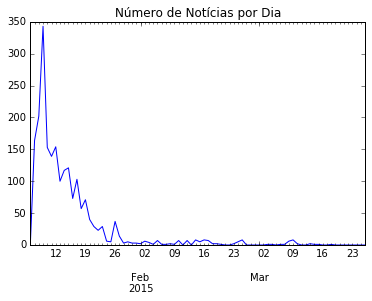

In [23]:
ts = pd.Series(y, rng)
ts.cumsum()
ts.plot(title='Número de Notícias por Dia' )
plt.savefig('grafic.png')

In [273]:
ts = pd.Series(y, rng)

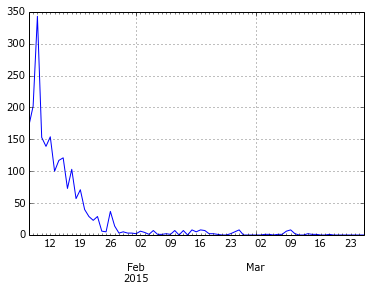

In [274]:
ts.cumsum()
ts.plot()


In [231]:
y_lista = y
x_lista = [i.date() for i in rng]

In [51]:
# TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
# r = bokeh.plotting.figure(x_axis_type="datetime", tools=TOOLS)

# r.line(x_list, y_list, color='#1F78B4', legend='ACME')
# bokeh.plotting.show(r)

In [233]:
# time_list1 = []
# time_list2 = []
# for i in time_list:
#     if i.hour < 8:
#         time_list1.append(i)
#     else:
#         time_list2.append(i)

In [234]:
# count_list = create_count_list(time_list2)

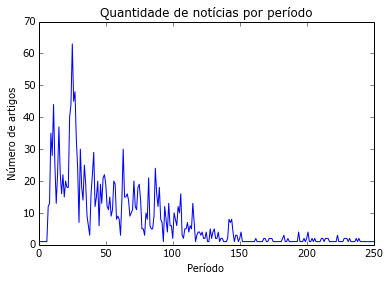

In [245]:
x_lista = []
y_lista = []
for pos, i in enumerate(count_list):
    x_lista.append(pos + 1)
    y_lista.append(i[1])

plt.plot(x_lista, y_lista)
plt.title('Quantidade de notícias por período')
plt.xlabel('Período')
plt.ylabel('Número de artigos')
plt.savefig('charlie.png', dpi=900)

In [253]:
y_lista = np.array(y_lista).astype('float')
y_lista /= max(y_lista)

r_t = [y_lista[pos]/y_lista[pos-1] for pos, i in enumerate(y_lista) if pos > 0]
r_t.insert(0, 1)

Rt = interp1d(x_lista, r_t, fill_value=0, bounds_error=False)

#Modelo SIR

In [254]:
# parameters
gamma = 0.8  # recovery rate  0.7
mu = 0.1  # 0.1
#beta = 3

rates = (gamma, mu)

# initial conditions
S0 = 1-y_lista[0]  # initial susceptibles population
I0 = y_lista[0]  # initial infected population
R0 = 0.00  # initial recovered population

y0 = [S0, I0, R0]

In [255]:
# differential-eq-system----------------------
def funct(y, t, gamma, mu):  #beta_t)
    S = y[0]
    I = y[1]
    R = y[2]

    # N = S + I + R

    beta_t = Rt(t)*gamma

    # the model equations
    dS = mu - beta_t * S * I - mu * S
    dI = beta_t * S * I - (gamma + mu) * I
    dR = gamma * I - mu * R
    return [dS, dI, dR]


def eq(par, initial_cond, start_t, end_t, incr):
    # -time-grid-----------------------------------
    t = np.linspace(start_t, end_t, incr)

    # integrate------------------------------------
    ds = integrate.odeint(funct, initial_cond, t, par)
    return ds[:, 0], ds[:, 1], ds[:, 2], t

S, I, R, T = eq(rates, y0, 1, 300, 1000)
N = 1

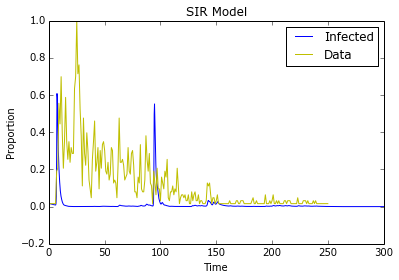

In [256]:
plt.figure()

# plt.plot(T, S/N, '-b', T, I/N, '-r', T, R/N, '-y')
# plt.legend(("Susceptible", "Infected", "Recovered"),'upper right')

plt.plot(T, I, label='Infected')
# plt.plot(T, S, label='Susceptible')
# plt.plot(T, R, label='Recovered')

plt.plot(x_lista, y_lista, 'y', label='Data')
# plt.plot(x_lista, Rt(x_lista)*gamma, '-g', label='beta_t')
plt.legend()

plt.title('SIR Model')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.savefig('2.1-SIR.png', dpi=900)
#print Rt(np.linspace(0,100,100))
plt.show()